# <center> <span style="color:#f6f794"> 🧼 The purpose of this jupyter notebook is to create pipelines to clean raw data </span> </center>

- I'll check here if the pipelines of cleaning have sense so it can be put in a .py file and use this way in the architecture of the project
- Also, Some metrics will be done in order to know what to extract and give to the client
- Furthermore feature enginering will be made

_____

### <span style="color:#f6f794"> 📚 Importing libraries and setting displays </span>

In [1]:
import pandas as pd
import numpy as np
import requests
import gzip
from io import BytesIO
import os
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import time
import csv
import re
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import re
import unicodedata

In [2]:
from sklearn.impute import SimpleImputer

### <span style="color:#f6f794"> 📂 Opening files and create dataframes of them </span>

In [3]:
# Setting paths
current_dir = os.getcwd()                            # \sentiment-analyzer-inc\eda
print(current_dir)
parent_dir = os.path.dirname(current_dir)            # \sentiment-analyzer-inc
print(parent_dir)
data_dir = os.path.join(current_dir, "data")         # \sentiment-analyzer-inc\eda\data
print(data_dir)
cleaning_file_path = os.path.join(current_dir, "")   # \sentiment-analyzer-inc\eda\data\
print(cleaning_file_path)

c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\data
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\sentiment-analyzer-inc\eda\


In [4]:
GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/sentiment-analyzer-inc/feature/eda/etl/data/youtube_comments_8r_mq50JNho.csv.gz"

def load_airbnb_data_from_github(url):
    """
    1er intento con video:
    https://www.youtube.com/watch?v-4GmbBoYQjE

    2do intento con video:
    https://www.youtube.com/watch?v=wQtb_NgXBUE

    3er intento con video:
    https://www.youtube.com/watch?v=8r_mq50JNho
    """
    print("⏯️ Downloading data from GitHub...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("⏯️ bar_chart: Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(
                f,
                sep=',',                  # Specify the delimiter
                encoding='utf-8',         # Specify the encoding
                quoting=csv.QUOTE_MINIMAL # Specify the quoting behavior
                )

        print(f"✅ white_check_mark: Data downloaded succesfully!")
        
        return df

    except requests.exceptions.RequestException as req_err:
        print(f"⚠️ Network/Request Error while downloading data: {req_err}")
        return None
    except Exception as e:
        print(f"⚠️ General Error while processing data: {e}")
        return None

# Creating dataframe from GitHub URL
df_youtube_extract = load_airbnb_data_from_github(GITHUB_CLEAN_URL)

⏯️ Downloading data from GitHub...
⏯️ bar_chart: Processing compressed file..
✅ white_check_mark: Data downloaded succesfully!


___________
# <center> <span style="color:#f6f794">  🧹🧹🧹🧹🧹🧹🧹 START CLEANING 🧹🧹🧹🧹🧹🧹🧹 </center>
__________

In [5]:
df_youtube_extract.columns

Index(['threadId', 'commentId', 'videoId', 'author', 'authorChannelId',
       'isReply', 'parentCommentId', 'publishedAtComment', 'text',
       'likeCountComment', 'replyCount'],
      dtype='object')

In [6]:
df_youtube_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   threadId            1500 non-null   object 
 1   commentId           1500 non-null   object 
 2   videoId             1500 non-null   object 
 3   author              1500 non-null   object 
 4   authorChannelId     1500 non-null   object 
 5   isReply             1500 non-null   bool   
 6   parentCommentId     372 non-null    object 
 7   publishedAtComment  1500 non-null   object 
 8   text                1500 non-null   object 
 9   likeCountComment    1500 non-null   int64  
 10  replyCount          1128 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 118.8+ KB


In [7]:
df_youtube_extract.sample(10)

threadId  \
830   UgzeJtYKoP8XynSQhw54AaABAg   
149   UgwRSrYoXWUQbayWDNJ4AaABAg   
1336  UgzN31nhg91rcJ8q5sp4AaABAg   
1194  Ugx62zKp9AbW-SXrEI94AaABAg   
633   Ugz9Gso8fu2EUcur5ih4AaABAg   
41    UgzXdSp81mV2K0rkDmV4AaABAg   
455   Ugxjiv9j-iJ4m-7XevJ4AaABAg   
1061  UgyNDD3xAKnE0SFOO314AaABAg   
1373  UgzfRbLnQlvoyger-3Z4AaABAg   
1335  UgxM37rBIbHKYinuVqp4AaABAg   

                                              commentId      videoId  \
830                          UgzeJtYKoP8XynSQhw54AaABAg  8r_mq50JNho   
149                          UgwRSrYoXWUQbayWDNJ4AaABAg  8r_mq50JNho   
1336                         UgzN31nhg91rcJ8q5sp4AaABAg  8r_mq50JNho   
1194  Ugx62zKp9AbW-SXrEI94AaABAg.AK3wcEKMs3sAK46dEIQ-uB  8r_mq50JNho   
633                          Ugz9Gso8fu2EUcur5ih4AaABAg  8r_mq50JNho   
41                           UgzXdSp81mV2K0rkDmV4AaABAg  8r_mq50JNho   
455                          Ugxjiv9j-iJ4m-7XevJ4AaABAg  8r_mq50JNho   
1061  UgyNDD3xAKnE0SFOO314AaABAg.AK41dJ9HkFMAK4mulTnQq3  8r_mq50JNho   
1373                         UgzfRbLnQlvoyger-3Z4AaABAg  8r_mq50JNho   
1335                         UgxM37rBIbHKYinuVqp4AaABAg  8r_mq50JNho   

                      author           authorChannelId  isReply  \
830   @WalterWoodworth-ev9me  UCuhivGoJnWOsrWL9qzV4K4A    False   
149             @JoelB-nz1jh  UC6GTYP5IJkKJJFjfO1G6fXw    False   
1336       @donaldwright2257  UCpzLjGZkySPwHrSUcMQmBBA    False   
1194               @wikkadxx  UC-lc24kRTjeL_QaXb4WW3ng     True   
633        @LeslieFraser-y2f  UCG04-zNxDAjM9zlBBvtnIJg    False   
41                 @vickryan  UCxmZV43DNBWAgehWzPJIIdA    False   
455            @godfellas483  UC8mKS70ikzh0HnMYWc565nQ    False   
1061        @guysumpthin2974  UCq04UxZ-yS3Y4BsX6qIqLxg     True   
1373      @dalehoffmanjr4759  UCku02hk2Q1VnJz-cwora8uA    False   
1335             @Marbeem444  UCSDdGp66w8Df5FNqosEkL8w    False   

                 parentCommentId    publishedAtComment  \
830                          NaN  2025-07-02T12:06:33Z   
149                          NaN  2025-07-02T20:07:20Z   
1336                         NaN  2025-07-02T08:50:23Z   
1194  Ugx62zKp9AbW-SXrEI94AaABAg  2025-07-02T11:09:57Z   
633                          NaN  2025-07-02T13:24:32Z   
41                           NaN  2025-07-03T03:03:24Z   
455                          NaN  2025-07-02T14:56:03Z   
1061  UgyNDD3xAKnE0SFOO314AaABAg  2025-07-02T17:28:05Z   
1373                         NaN  2025-07-02T08:41:32Z   
1335                         NaN  2025-07-02T08:50:50Z   

                                                   text  likeCountComment  \
830                                      Like the hat.😂                 0   
149   This woman should also be deported because she...                 0   
1336  "The Constitution IS To Be Protected Against A...                 1   
1194                       Save yourself, leave the US.                 0   
633                                   She is disgusting                 0   
41    Border barbie is working on it. Blurry video u...                 0   
455   "Thousands of murderers and rapists..." and th...                 1   
1061                                            Treason                 3   
1373                                    Cnn is a joke !                 1   
1335      God bless Donald Trump and God bless America.                 2   

      replyCount  
830          0.0  
149          0.0  
1336         0.0  
1194         NaN  
633          0.0  
41           0.0  
455          0.0  
1061         NaN  
1373         0.0  
1335         0.0

In [8]:
df_youtube_extract.shape # (73998, 11)

(1500, 11)

#### <span style="color:#F3A006"> 1️⃣ Columns </span>

- Column's names format: lowercase with underscore as spaces

In [9]:
# Changin the names to lowercase and with a underscore to as spaces to make it easier to work with.
df_youtube_extract.columns = (
    df_youtube_extract.columns
    .str.replace(r'(?<!^)(?=[A-Z])', '_', regex=True)  # Insert underscore before each uppercase (except start)
    .str.lower()                                       # Convert all to lowercase
    .str.strip()                                       # Remove leading and trailing spaces in case there were any
)

In [10]:
df_youtube_extract.columns

Index(['thread_id', 'comment_id', 'video_id', 'author', 'author_channel_id',
       'is_reply', 'parent_comment_id', 'published_at_comment', 'text',
       'like_count_comment', 'reply_count'],
      dtype='object')

#### <span style="color:#F3A006"> 2️⃣ Duplicates </span>

- There are no duplicate columns

In [11]:
# Checking if there are duplicate columns
df_youtube_extract.columns.duplicated().any()         # np.False_
df_youtube_extract["comment_id"].duplicated().any()   # np.True_
df_youtube_extract["comment_id"].nunique()            # 73992
# df_youtube_extract["comment_id"].nunique()          # 73992
# df_youtube_extract["video_id"].duplicated().any()   # np.True_
# df_youtube_extract["video_id"].nunique()            # 1

1494

In [12]:
def handle_duplicates(df):
    """
    Handle duplicate rows in the dataset with updated column names.
    """
    df_clean = df.copy()
    
    # First, identify exact duplicates across all columns
    df_clean = df_youtube_extract.drop_duplicates()
    
    # Ensure each comment_id is unique
    df_clean = df_youtube_extract.drop_duplicates(subset=['comment_id'], keep='first')
    
    # Remove likely duplicates (same author, text, and timestamp)
    df_clean = df_youtube_extract.drop_duplicates(
        subset=['author', 'text', 'published_at_comment'], 
        keep='first'
    )
    
    return df_clean

# Handling duplicates in the dataset
df_youtube_extract = handle_duplicates(df_youtube_extract)


#### <span style="color:#F3A006">  3️⃣  Nulls </span>

- Before imputing:
    - parent_comment_id:  qty of nulls:  973
    - text:               qty of nulls:    2
    - reply_count:        qty of nulls:   27

- After imputation:
    - parent_comment_id:
        - 
    - text:
        - 
    - reply_count: 
        - This value only makes sense for top-level comments, as replies do not receive further replies. Using -1 clearly distinguishes replies from root comments without mixing them with valid counts (like 0). It signals “not applicable” without being confused with an actual reply count.
     


In [13]:
# Checking if there are nulls
df_youtube_extract.isnull().sum()            # "author" : 30  |  "parent_comment_id":  71623     |  "text": 129      |    reply_count: 2375
# Checking if there are empty rows
df_youtube_extract.isna().sum()              # "author" : 30  |  "parent_comment_id":  71623     |  "text": 129      |    reply_count: 2375
# # Checkirng if there are empty strings
df_youtube_extract.eq('').sum()              # 0
# Checking if there are "nan" values
df_youtube_extract.eq('nan').sum()           # 0

thread_id               0
comment_id              0
video_id                0
author                  0
author_channel_id       0
is_reply                0
parent_comment_id       0
published_at_comment    0
text                    0
like_count_comment      0
reply_count             0
dtype: int64

In [14]:
def analyze_nulls(df):
    """
    Analyze null values percentage and provide basic recommendations
    on imputing or dropping, column by column.
    """
    total_rows = len(df)
    report = []

    for col in df.columns:
        null_count = df[col].isna().sum()
        null_pct = null_count / total_rows * 100
        
        if null_count == 0:
            recommendation = "No missing values"
        else:
            # Basic heuristic recommendations
            if col in ['thread_id', 'comment_id', 'video_id', 'text']:
                recommendation = "Drop rows with nulls (IDs or text)"
            elif col in ['author', 'author_channel_id']:
                if null_pct < 5:
                    recommendation = "Impute with 'unknown' or similar"
                else:
                    recommendation = "High missing rate: consider data quality issues"
            elif col == 'is_reply':
                recommendation = "Impute with False if missing means no reply"
            elif col == 'parent_comment_id':
                recommendation = "Keep nulls (not a reply indicator)"
            elif col == 'published_at_comment':
                if null_pct < 1:
                    recommendation = "Drop rows with null timestamps"
                else:
                    recommendation = "Consider flag + placeholder or investigate further"
            elif col in ['like_count_comment', 'reply_count']:
                recommendation = "Impute with 0 (absence = zero engagement)"
            else:
                recommendation = "Check context; impute or drop accordingly"
        
        report.append({
            "column": col,
            "null_count": null_count,
            "null_percentage": round(null_pct, 2),
            "recommendation": recommendation
        })
    
    return report

# Calling the function to analyze nulls
null_analysis_report = analyze_nulls(df_youtube_extract)
null_analysis_report

[{'column': 'thread_id',
  'null_count': np.int64(0),
  'null_percentage': np.float64(0.0),
  'recommendation': 'No missing values'},
 {'column': 'comment_id',
  'null_count': np.int64(0),
  'null_percentage': np.float64(0.0),
  'recommendation': 'No missing values'},
 {'column': 'video_id',
  'null_count': np.int64(0),
  'null_percentage': np.float64(0.0),
  'recommendation': 'No missing values'},
 {'column': 'author',
  'null_count': np.int64(0),
  'null_percentage': np.float64(0.0),
  'recommendation': 'No missing values'},
 {'column': 'author_channel_id',
  'null_count': np.int64(0),
  'null_percentage': np.float64(0.0),
  'recommendation': 'No missing values'},
 {'column': 'is_reply',
  'null_count': np.int64(0),
  'null_percentage': np.float64(0.0),
  'recommendation': 'No missing values'},
 {'column': 'parent_comment_id',
  'null_count': np.int64(1127),
  'null_percentage': np.float64(75.44),
  'recommendation': 'Keep nulls (not a reply indicator)'},
 {'column': 'published_at_co

In [15]:
def handle_nulls(df):
    
    df_clean = df.copy()

    null_handling_strategies = {
        # IDs - must exist, drop rows if null
        'thread_id': {'action': 'drop'},
        'comment_id': {'action': 'drop'},
        'video_id': {'action': 'drop'},

        # Author info - fill with 'unknown', but track frequency externally
        'author': {'action': 'fill', 'value': 'unknown'},
        'author_channel_id': {'action': 'fill', 'value': 'unknown'},

        # Boolean flag - assume False if missing, but validate assumption
        'is_reply': {'action': 'fill', 'value': False},

        # Parent comment ID - missing means no reply, leave as is
        'parent_comment_id': {'action': 'leave'},

        # Timestamp - drop if missing values are few, otherwise impute and flag
        'published_at_comment': {'action': 'conditional_drop', 'threshold': 0.05},

        # Text - no text means no analysis, drop such rows
        'text': {'action': 'drop'},

        # Engagement metrics - fill missing values with zero
        'like_count_comment': {'action': 'fill', 'value': 0},
        'reply_count': {'action': 'fill', 'value': 0}
    }

    for column, strategy in null_handling_strategies.items():
        if column not in df_clean.columns:
            continue

        action = strategy['action']
        if action == 'drop':
            # Drop rows where this column is null
            df_clean = df_clean.dropna(subset=[column])
        elif action == 'fill':
            # Fill nulls with specified value
            df_clean[column] = df_clean[column].fillna(strategy['value'])
        elif action == 'leave':
            # Do nothing for this column
            continue
        elif action == 'conditional_drop':
            # Calculate ratio of nulls in this column
            null_ratio = df_clean[column].isna().mean()
            threshold = strategy.get('threshold', 0)
            if null_ratio <= threshold:
                # If nulls are under threshold, drop those rows
                df_clean = df_clean.dropna(subset=[column])
            else:
                # If many nulls, fill with a placeholder and add a flag column
                fill_value = pd.Timestamp('1970-01-01')  # placeholder date
                df_clean[column + '_was_null'] = df_clean[column].isna()
                df_clean[column] = df_clean[column].fillna(fill_value)

    return df_clean

In [16]:
# Handling nulls in the dataset
df_youtube_extract = handle_nulls(df_youtube_extract)

#### <span style="color:#F3A006"> 4️⃣ Changing the data types </span>

- DateTime: 
    - published_at

In [17]:
df_youtube_extract.dtypes

thread_id                object
comment_id               object
video_id                 object
author                   object
author_channel_id        object
is_reply                   bool
parent_comment_id        object
published_at_comment     object
text                     object
like_count_comment        int64
reply_count             float64
dtype: object

In [18]:
df_youtube_extract.head(2)

thread_id  \
0  UgyNDD3xAKnE0SFOO314AaABAg   
1  UgyNDD3xAKnE0SFOO314AaABAg   

                                          comment_id     video_id     author  \
0                         UgyNDD3xAKnE0SFOO314AaABAg  8r_mq50JNho   @FoxNews   
1  UgyNDD3xAKnE0SFOO314AaABAg.AK41dJ9HkFMAK4688VFytt  8r_mq50JNho  @rh-sd7tf   

          author_channel_id  is_reply           parent_comment_id  \
0  UCXIJgqnII2ZOINSWNOGFThA     False                         NaN   
1  UC0Mo02Lr8_zEBRmnwA8Nj-w      True  UgyNDD3xAKnE0SFOO314AaABAg   

   published_at_comment                                               text  \
0  2025-07-02T10:26:16Z  Read more: https://www.foxnews.com/politics/se...   
1  2025-07-02T11:05:34Z  You mean Alligator Auschwitz? Republican Nazis...   

   like_count_comment  reply_count  
0                  24          6.0  
1                   1          0.0

In [19]:
def convert_data_types(df, conversions):
   
    df_copy = df.copy()
    
    for col, conversion in conversions.items():
        if col not in df_copy.columns:
            continue
        try:
            if callable(conversion):
                df_copy[col] = conversion(df_copy[col])
            else:
                df_copy[col] = df_copy[col].astype(conversion)
        except Exception as e:
            print(f"Warning: Could not convert column '{col}': {e}")
    
    return df_copy

In [20]:
conversions = {
    'published_at_comment': lambda col: pd.to_datetime(col, errors='coerce'),
    'like_count_comment': 'int',
    'reply_count': 'int',
    'is_reply': 'bool',
    'author_channel_id': 'string'
}

df_youtube_extract = convert_data_types(df_youtube_extract, conversions)


#### <span style="color:#F3A006"> 5️⃣ Eliminating invisible row breakes </span>

In [21]:
# Eliminating row breaks and extra spaces in the comments
def remove_line_breaks(df, columns):
    
    df_copy = df.copy()
    
    for col in columns:
        if col in df_copy.columns:
            df_copy[col] = df_copy[col].str.replace(r'[\r\n]+', ' ', regex=True).str.strip()
    
    return df_copy

# Calling the function to remove line breaks
df_youtube_extract = remove_line_breaks(df_youtube_extract, ['text'])

#### <span style="color:#F3A006"> 6️⃣ Feature Enginering </span>

- <span style="color:#D63A7E"> ['comment_length'] </span>
- <span style="color:#D63A7E"> ['word_count']</span>

In [22]:
def create_colums_lentgh(df):
    df['comment_length'] = df['text'].apply(lambda x: len(str(x)))    # How many characters in the comment
    df['word_count'] = df['text'].apply(lambda x: len(str(x).split())) # How many words in the comment

# Call function
create_colums_lentgh(df_youtube_extract)

- <span style="color:#D63A7E"> ['has_emoji'] </span>  
- <span style="color:#D63A7E">['has_url'] </span> 
- <span style="color:#D63A7E">['has_special_char']</span> 

In [23]:
# Checking for emojis in column 'text' since it might indicate sentiment and influence the model
EMOJI_PATTERN = re.compile(
    "[\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"   # symbols & pictographs
    "\U0001F680-\U0001F6FF"   # transport & map symbols
    "\U0001F1E0-\U0001F1FF"   # flags (iOS)
    "\U00002702-\U000027B0"   # Dingbats
    "\U000024C2-\U0001F251"   # Enclosed characters
    "]+", flags=re.UNICODE
)

# Checking for URLs in column 'text' since it might indicate sentiment and influence the model
URL_PATTERN = re.compile(r'https?://\S+|www\.\S+')

# Checking for special characters in column 'text' since it might indicate sentiment and influence the model
SPECIAL_CHAR_PATTERN = re.compile(r'[^a-zA-Z0-9\s.,?!]')

# Function to flag features in 'text'
def extract_text_features(df):
    df['has_emoji'] = df['text'].apply(lambda x: bool(EMOJI_PATTERN.search(str(x))))
    df['has_url'] = df['text'].apply(lambda x: bool(URL_PATTERN.search(str(x))))
    df['has_special_char'] = df['text'].apply(lambda x: bool(SPECIAL_CHAR_PATTERN.search(str(x))))
    return df

df_youtube_extract = extract_text_features(df_youtube_extract)


- <span style="color:#D63A7E">['extracted_urls'] </span> 

    - Removing URL's from the text column since it makes noise for the model

In [24]:
def extract_and_remove_urls(df, text_column='text'):
    """
    1. Extracts URLs to new column 'extracted_urls' (as lists)
    2. Removes URLs from original text column
    3. Adds 'has_url' boolean flag
    """
    df = df.copy()
    
    # Extract URLs (store as list)
    df['extracted_urls'] = df[text_column].apply(
        lambda x: re.findall(r'https?://\S+|www\.\S+', str(x))
    )
    
    # Remove URLs from text (keep everything else)
    df[text_column] = df[text_column].apply(
        lambda x: re.sub(r'https?://\S+|www\.\S+', '', str(x))
    )
    
    # Add simple boolean flag
    df['has_url'] = df['extracted_urls'].apply(lambda x: len(x) > 0)
    
    return df

df_youtube_extract = extract_and_remove_urls(df_youtube_extract)

- <span style="color:#D63A7E"> ['is_self_promotional']</span> 

In [25]:
self_promo_keywords = {
    # English
    'en': [
        'check out my', 'subscribe to', 'follow me', 'visit my', 'link in bio',
        'watch my', 'support my', 'my channel', 'my content', 'please subscribe',
        'giveaway on my', 'join my', 'don’t forget to follow', 'my new video',
        'check my', 'like and subscribe', 'hit subscribe', 'sub to my',
        'drop a sub', 'my latest video', 'my socials', 'follow my', 'my page',
        'my profile', 'my website', 'my blog', 'my podcast', 'my merch'
    ],
    
    # Spanish
    'es': [
        'mira mi', 'suscríbete a', 'sígueme', 'visita mi', 'enlace en bio',
        've mi', 'apoya mi', 'mi canal', 'mi contenido', 'por favor suscríbete',
        'sorteo en mi', 'únete a mi', 'no olvides seguir', 'mi nuevo video',
        'checa mi', 'dale like y suscríbete', 'suscríbete a mi', 'mis redes'
    ],
    
    # Hindi
    'hi': [
        'मेरा चैनल देखो', 'सब्सक्राइब करो', 'मुझे फॉलो करो', 'मेरी वेबसाइट देखो',
        'मेरा लिंक', 'मेरा वीडियो देखो', 'मेरे चैनल को सपोर्ट करो', 'मेरा कंटेंट',
        'कृपया सब्सक्राइब करें', 'मेरे चैनल से जुड़ें', 'मेरा नया वीडियो'
    ],
    
    # Portuguese
    'pt': [
        'confira meu', 'inscreva-se no', 'me siga', 'visite meu', 'link na bio',
        'assista meu', 'apoie meu', 'meu canal', 'meu conteúdo', 'por favor se inscreva',
        'sorteio no meu', 'junte-se ao meu', 'não esqueça de seguir'
    ],
    
    # French
    'fr': [
        'regarde mon', 'abonne-toi à', 'suis-moi', 'visite mon', 'lien en bio',
        'regarde ma', 'soutiens mon', 'ma chaîne', 'mon contenu', 'abonne-toi s\'il te plaît',
        'concours sur mon', 'rejoins mon', 'n\'oublie pas de suivre'
    ],
    
    # German
    'de': [
        'schau dir mein', 'abonniere', 'folge mir', 'besuche mein', 'link in bio',
        'sieh dir mein', 'unterstütze mein', 'mein kanal', 'mein inhalt', 'bitte abonnieren',
        'gewinnspiel auf mein', 'tritt mein bei', 'vergiss nicht zu folgen'
    ],
    
    # Russian
    'ru': [
        'посмотри мой', 'подпишись на', 'подпишись на меня', 'зайди на мой', 'ссылка в профиле',
        'посмотри мое', 'поддержи мой', 'мой канал', 'мой контент', 'пожалуйста подпишись',
        'конкурс на моем', 'присоединяйся к моему', 'не забудь подписаться'
    ],
    
    # Japanese
    'ja': [
        '私のチャンネルを見て', '登録して', 'フォローして', '私のサイトを見て',
        'プロフィールのリンク', '私の動画を見て', '私のチャンネルをサポートして', '私のコンテンツ',
        'チャンネル登録お願いします', '私の新しい動画'
    ],
    
    # Arabic
    'ar': [
        'شاهد قناتي', 'اشترك في', 'تابعني', 'زور موقعي', 'الرابط في البايو',
        'ادعم قناتي', 'قناتي', 'محتواي', 'من فضلك اشترك', 'انضم إلى قناتي',
        'لا تنسى المتابعة'
    ]
}

def is_self_promotional(text):
    if not isinstance(text, str):
        return False
        
    text = text.lower()
    # Check all languages
    for lang_keywords in self_promo_keywords.values():
        if any(phrase in text for phrase in lang_keywords):
            return True
    return False

df_youtube_extract['is_self_promotional'] = df_youtube_extract['text'].apply(is_self_promotional)

- <span style="color:#D63A7E">['contains_tag']  </span> 

In [26]:
# Making a new column to detect wether the comment is tagging an account in the comment 
def contains_tag(text):
    return '@' in text

df_youtube_extract['contains_tag'] = df_youtube_extract['text'].apply(contains_tag)

df['sentiment_score'] = sentiment_results['compound']
    df['sentiment_type'] = sentiment_results['type']
    df['sentiment_intensity'] = sentiment_results['intensity']

- <span style="color:#D63A7E"> ["sentiment_score"] </span> 
- <span style="color:#D63A7E"> ["sentiment_type"] </span> 
- <span style="color:#D63A7E"> ["sentiment_intensity"] </span> 

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment(df, text_column='text'):
        
    analyzer = SentimentIntensityAnalyzer()
    
    def get_sentiment(text):
        if not isinstance(text, str) or not text.strip():
            return {'compound': 0, 'type': 'neutral', 'intensity': 'weak'}
        
        scores = analyzer.polarity_scores(text)
        compound = scores['compound']
        
        # Determine sentiment type
        if compound >= 0.05:
            sentiment = 'positive'
        elif compound <= -0.05:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'
        
        # Determine intensity
        abs_compound = abs(compound)
        if abs_compound > 0.5:
            intensity = 'strong'
        elif abs_compound > 0.2:
            intensity = 'moderate'
        else:
            intensity = 'weak'
        
        return {
            'compound': compound,
            'type': sentiment,
            'intensity': intensity
        }
    
    # Apply sentiment analysis
    sentiment_results = df[text_column].apply(get_sentiment).apply(pd.Series)
    
    # Add new columns to dataframe
    df['sentiment_score'] = sentiment_results['compound']
    df['sentiment_type'] = sentiment_results['type']
    df['sentiment_intensity'] = sentiment_results['intensity']
    
    return df

# Apply to your dataframe
df_youtube_extract = analyze_sentiment(df_youtube_extract)

- <span style="color:#D63A7E"> ["is_toxic"]         </span> 
- <span style="color:#D63A7E"> ["is_severe_toxic"]  </span> 
- <span style="color:#D63A7E"> ["is_obscene"]       </span> 
- <span style="color:#D63A7E"> ["is_threat"]        </span> 
- <span style="color:#D63A7E"> ["is_insult"]        </span> 
- <span style="color:#D63A7E"> ["is_identity_hate"] </span> 

INTENTO DE CHATGPT

In [57]:
df_youtube_extract.columns

Index(['thread_id', 'comment_id', 'video_id', 'author', 'author_channel_id',
       'is_reply', 'parent_comment_id', 'published_at_comment', 'text',
       'like_count_comment', 'reply_count', 'comment_length', 'word_count',
       'has_emoji', 'has_url', 'has_special_char', 'extracted_urls',
       'is_self_promotional', 'contains_tag', 'sentiment_score',
       'sentiment_type', 'sentiment_intensity', 'sentiment_score',
       'sentiment_type', 'sentiment_intensity', 'vader_compound', 'vader_pos',
       'vader_neg', 'vader_neu', 'toxicity_confidence', 'is_toxic',
       'is_severe_toxic', 'is_obscene', 'is_threat', 'is_insult',
       'is_identity_hate', 'is_arabic_toxic', 'is_hindi_toxic',
       'combined_toxicity_score', 'caps_words_count', 'toxic_pattern_score',
       'exclamation_count', 'question_count', 'emoji_toxic_count',
       'composite_toxicity_score', 'final_toxic_flag'],
      dtype='object')

In [ ]:
from detoxify import Detoxify
import pandas as pd
import re
from langdetect import detect, LangDetectException
from transformers import pipeline
import emoji
from math import log10

TRENDING_2025_TOXIC_WORDS = {
    'es': {
        'politica': ['perro sanchez', 'corrupto', 'golpista', 'facha', 'zorro', 'miserable','cobarde', 'mentiroso', 'chorizo', 'populista', 'mangante',
            'dictador', 'fascista', 'indeseable', 'traidor'],

        'social': ['okupa', 'zorra', 'maricon', 'racista', 'machista', 'violador','terrorista', 'genocida', 'racista', 'homofobo', 'negro de mierda'],
    },
    'en': {
        'politics': ['traitor', 'corrupt', 'idiot', 'liar', 'fake news', 'racist', 'fascist','nutjob', 'cuck', 'snowflake', 'loser', 'scumbag', 'bipolar', 'maga',
            'woke', 'cancel culture','trump'],

        'social': ['racist', 'sexist', 'homophobe', 'terrorist', 'loser', 'scumbag','asshole', 'loser', 'idiot', 'crybaby'],
    },
    'fr': {
        'politique': ['menteur', 'corrompu', 'traître', 'dictateur', 'fasciste', 'imbécile','populiste', 'escroc', 'machiavel', 'menteuse', 'bourreau'],

        'social': ['raciste', 'sexiste', 'homophobe', 'terroriste', 'connard', 'salaud','imbécile', 'abruti'],
    },
    'pt': {
        'politica': ['corrupto', 'traidor', 'mentiroso', 'fascista', 'idiota', 'populista', 'canalha', 'ladrão', 'imbecil', 'covarde'],

        'social': [ 'racista', 'sexista', 'homofóbico', 'terrorista', 'idiota', 'babaca','babaca', 'otário'],
    },
    'hi': {
        'राजनीति': [ 'भ्रष्ट', 'कपटी', 'राजद्रोही', 'झूठा', 'नासमझ', 'गद्दार', 'अराजक','तानाशाह', 'झूठा', 'मूर्ख'],

        'सामाजिक': ['जातिवादी', 'लिंगवादी', 'घृणास्पद', 'आतंकवादी', 'मूर्ख', 'असभ्य'],
    },
    'ru': {
        'политика': ['предатель', 'коррумпированный', 'лжец', 'фашист', 'идиот', 'мошенник','диктатор', 'популист', 'жмот', 'коварный'],

        'социальные': ['расист', 'сексист', 'гомофоб', 'террорист', 'тупица', 'мудак'],
    },
   
    'ar': {
        'politics': [
            'خائن',       # traitor
            'كاذب',       # liar
            'فاسد',       # corrupt
            'غبي',        # stupid
            'أحمق',       # fool
            'أبله',       # idiot
        ],
        'social': [
            'حقير',       # despicable
            'غبي',        # stupid
            'أحمق',       # fool
            'سخيف',       # silly
            'وضيع',       # lowly
        ],
    }
}


TOXIC_WORDS_EN = ['idiot', 'stupid', 'hate', 'dumb', 'fool', 'trash', 'moron', 'loser','shut up', 'kill yourself', 'bitch', 'asshole', 'retard']

TOXIC_WORDS_ES = ['idiota', 'estupido', 'odio', 'tonto', 'imbecil', 'basura', 'perdedor','callate', 'muerete', 'zorra', 'gilipollas', 'subnormal']

TOXIC_WORDS_FR = ['idiot', 'stupide', 'haine', 'con', 'imbecile', 'ordure','perdant', 'tais-toi', 'meurs', 'salope', 'connard', 'abruti']

TOXIC_WORDS_PT = ['idiota', 'estupido', 'odio', 'burro', 'imbecil', 'lixo','perdedor', 'cale a boca', 'morra', 'vaca', 'idiota', 'retardado']

TOXIC_WORDS_HI = ['बहक', 'मूर्ख', 'गधा', 'हरामी', 'बेवकूफ', 'हरामी', 'बकवास']

TOXIC_WORDS_RU = ['идиот', 'тупой', 'ненависть', 'дурак', 'придурок', 'гадость','неудачник', 'заткнись', 'умри', 'сука', 'мудак', 'отморозок']

TOXIC_WORDS_AR = [
    'غبي',       # stupid
    'أحمق',      # fool
    'حقير',      # vile
    'سخيف',      # ridiculous, silly
    'غبي جدا',   # very stupid
    'أهبل',      # idiot
    'محتال',     # scammer
    'وضيع',      # lowly, mean
    'خبيث',      # malicious
    'تافه',      # trivial, insignificant (insult)
    'حقير',      # despicable
]

TOXIC_EMOJIS = set(['🤬', '💀', '🖕', '👿', '😡', '🔥', '💣','🤥','🤡','💩','⚰️','🔪','🧨'])

ACCENT_MAP = str.maketrans("áàäâãåçéèëêíìïîñóòöôõúùüûýÿ","aaaaaaceeeeiiiinooooouuuuyy")

def remove_accents_manual(text):
    return text.translate(ACCENT_MAP)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = remove_accents_manual(text)
    return text

def count_caps_words(text):
    return sum(1 for w in text.split() if w.isupper() and len(w) > 1)

def toxic_pattern_score(text, lang=None):
    text_lower = text.lower()
    score = 0
    
    word_lists = {
        'en': TOXIC_WORDS_EN,
        'es': TOXIC_WORDS_ES,
        'hi': TOXIC_WORDS_HI,
        'fr': TOXIC_WORDS_FR,
        'pt': TOXIC_WORDS_PT,
        'ru': TOXIC_WORDS_RU,
        'ar': TOXIC_WORDS_AR
    }

    supported_langs = set(word_lists.keys())

    # Si no se pasa idioma, se intenta detectar (puedes cambiar por tu función)
    if lang is None:
        try:
            from langdetect import detect
            lang = detect(text)
        except:
            lang = None

    # Si el idioma detectado es soportado, usa solo ese + inglés como respaldo
    if lang in supported_langs:
        # concatena listas para idioma detectado + inglés sin duplicados
        tox_words = set(word_lists[lang]) | set(word_lists['en'])
    else:
        # No detectado o no soportado: usa todas las listas juntas
        tox_words = set()
        for wl in word_lists.values():
            tox_words.update(wl)

    # Calcula score para palabras tóxicas
    for w in tox_words:
        count = text_lower.count(w)
        if count:
            score += count * (2 if ' ' in w else 1)

    # Añade trending toxic words solo para el idioma detectado (si disponible)
    if lang in TRENDING_2025_TOXIC_WORDS:
        trending_lang = TRENDING_2025_TOXIC_WORDS[lang]
        for category, words in trending_lang.items():
            for w in words:
                count = text_lower.count(w)
                if count:
                    score += count * 2  # peso extra

    return score


def count_emojis(text):
    return sum(1 for c in text if c in TOXIC_EMOJIS)

def detect_language_safe(text):
    try:
        return detect(text) if len(text) > 10 else 'unknown'
    except LangDetectException:
        return 'unknown'

try:
    hindi_toxicity = pipeline(
        "text-classification",
        model="ai4bharat/indic-bert-hate-speech-detection",
        device=-1
    )
    print("Hindi toxicity model loaded successfully.")
except Exception as e:
    hindi_toxicity = None
    print(f"Failed to load Hindi toxicity model: {e}")

arabic_toxicity = pipeline(
    "text-classification",
    model="Hate-speech-CNERG/indic-abusive-allInOne-MuRIL", # I foud this on the web page: https://huggingface.co/
    device=-1
)

detox_model = Detoxify('multilingual')

def analyze_toxicity_multilang(df, text_column='text', base_threshold=0.15):
    toxic_cols = [
        'is_toxic', 'is_severe_toxic', 'is_obscene', 'is_threat', 'is_insult',
        'is_identity_hate', 'is_arabic_toxic', 'is_hindi_toxic', 'combined_toxicity_score',
        'caps_words_count', 'toxic_pattern_score', 'exclamation_count', 'question_count',
        'emoji_toxic_count', 'composite_toxicity_score', 'final_toxic_flag'
    ]
    for col in toxic_cols:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

    def get_flags(row):
        text = row[text_column]
        likes = row.get('like_count_comment', None)

        cleaned = clean_text(text)
        if not cleaned or len(cleaned) < 2:
            return {col: 0 if 'score' in col or 'count' in col else False for col in toxic_cols}

        lang = detect_language_safe(cleaned)

        scores = detox_model.predict(cleaned)

        arabic_score = 0
        if any('\u0600' <= c <= '\u06FF' for c in cleaned):
            try:
                result = arabic_toxicity(cleaned)[0]
                arabic_score = result['score'] if result['label'] == 'negative' else 0
            except:
                arabic_score = 0

        hindi_score = 0
        if hindi_toxicity and lang == 'hi':
            try:
                res = hindi_toxicity(cleaned)[0]
                hindi_score = res['score'] if res['label'].lower() in ['hateful', 'hate'] else 0
            except:
                hindi_score = 0

        caps_count = count_caps_words(cleaned)
        exclams = cleaned.count('!')
        questions = cleaned.count('?')
        pattern_score = toxic_pattern_score(cleaned, lang=lang)
        emoji_toxic_count = count_emojis(cleaned)

        combined = max(scores['toxicity'], arabic_score, hindi_score)

        composite_score = (
            combined * 2 +
            pattern_score * 0.5 +
            (caps_count * 0.3) +
            (exclams * 0.1) +
            (questions * 0.05) +
            (emoji_toxic_count * 0.7)
        )

        # Calculate like weight
        if likes is not None and isinstance(likes, (int, float)) and likes >= 0:
            like_weight = 1 / log10(likes + 10)
            composite_score *= like_weight

        # Calculate reply count weight
        reply_count = row.get('reply_count', None)
        if reply_count is not None and isinstance(reply_count, (int, float)) and reply_count >= 0:
            reply_weight = min(reply_count, 30) / 30  # Normaliza entre 0 y 1
            composite_score *= (1 + reply_weight * 0.3)  # Incremento máximo del 30%


        final_toxic = composite_score > (base_threshold * 3)

        flags = {
            'is_toxic': combined > base_threshold,
            'is_severe_toxic': scores['severe_toxicity'] > base_threshold,
            'is_obscene': scores['obscene'] > base_threshold,
            'is_threat': scores['threat'] > base_threshold,
            'is_insult': scores['insult'] > base_threshold,
            'is_identity_hate': scores['identity_attack'] > base_threshold,
            'combined_toxicity_score': combined,
            'caps_words_count': caps_count,
            'toxic_pattern_score': pattern_score,
            'exclamation_count': exclams,
            'question_count': questions,
            'emoji_toxic_count': emoji_toxic_count,
            'composite_toxicity_score': composite_score,
            'final_toxic_flag': final_toxic
        }

        return flags

    toxicity_flags = df.apply(get_flags, axis=1).apply(pd.Series)
    df = pd.concat([df, toxicity_flags], axis=1)
    return df


def test_thresholds(df, text_column='text', thresholds=[0.1, 0.12, 0.15, 0.18, 0.2, 0.25]):
    results = []
    for th in thresholds:
        print(f"\n--- Testing threshold = {th} ---")
        df_test = analyze_toxicity_multilang(df.copy(), text_column=text_column, base_threshold=th)
        total_toxic = df_test['is_toxic'].sum()
        severe_toxic = df_test['is_severe_toxic'].sum()
        print(f"Total toxic comments: {total_toxic} / {len(df_test)}")
        print(f"Severe toxic comments: {severe_toxic} / {len(df_test)}")
        results.append({'threshold': th, 'total_toxic': total_toxic, 'severe_toxic': severe_toxic})
    return results

# --------------------------------------------------------------------------------------------------------------------
results = test_thresholds(df_youtube_extract, text_column='text')
print("\nSummary of thresholds test:")
for r in results:
    print(f"Threshold {r['threshold']}: Toxic {r['total_toxic']}, Severe {r['severe_toxic']}")


Failed to load Hindi toxicity model: ai4bharat/indic-bert-hate-speech-detection is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`


Device set to use cpu



--- Testing threshold = 0.1 ---

Analyzing text: Read more:... | Detected language: unknown
Detoxify scores: {'toxicity': np.float32(0.000547245), 'severe_toxicity': np.float32(5.2047224e-05), 'obscene': np.float32(0.0003742413), 'identity_attack': np.float32(0.00015506707), 'insult': np.float32(0.00039592324), 'threat': np.float32(8.276807e-05), 'sexual_explicit': np.float32(3.9281702e-05)}
Caps words count: 0
Exclamation marks count: 0
Question marks count: 0
Toxic pattern score (keyword hits): 0
Emoji toxic count: 0
Combined toxicity score (max of models): 0.0005472450284287333
Composite toxicity score (weighted sum): 0.001
Final toxic flag (threshold 0.30000000000000004): False

Analyzing text: You mean Alligator Auschwitz? Republican Nazis and their con... | Detected language: en
Detoxify scores: {'toxicity': np.float32(0.4815178), 'severe_toxicity': np.float32(8.096956e-05), 'obscene': np.float32(0.0009589028), 'identity_attack': np.float32(0.035078313), 'insult': np.float32(0.1

## <span style="color:#F3A006"> 🔟 Summary </span>

In [ ]:
df_youtube_extract.columns

In [ ]:
df_youtube_extract.info()

ESTE ES EL MAPA DE PALABRAS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaelp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 50 words before stopwords removal: [('the', 1167), ('to', 774), ('and', 698), ('a', 530), ('is', 528), ('of', 450), ('you', 405), ('that', 380), ('they', 351), ('in', 332), ('it', 332), ('are', 323), ('for', 317), ('i', 257), ('this', 253), ('be', 240), ('app', 238), ('people', 201), ('ice', 198), ('s', 198), ('on', 176), ('with', 175), ('t', 159), ('not', 156), ('trump', 152), ('have', 151), ('all', 142), ('what', 137), ('cnn', 133), ('your', 126), ('no', 124), ('their', 119), ('so', 118), ('we', 114), ('them', 114), ('like', 113), ('if', 107), ('who', 104), ('should', 103), ('but', 102), ('will', 101), ('just', 100), ('she', 98), ('can', 96), ('from', 96), ('up', 95), ('do', 94), ('an', 93), ('get', 92), ('america', 90)]


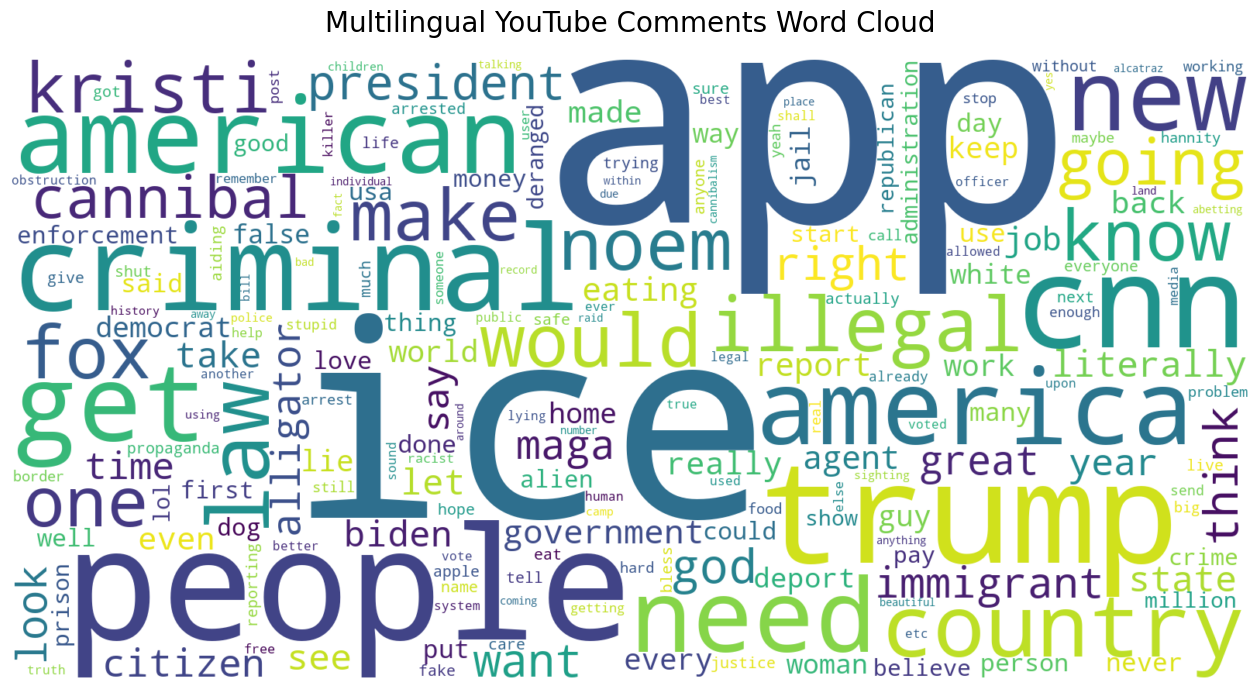

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords for multiple languages (only once)
nltk.download('stopwords')

def clean_text_for_wordcloud(text):
    """Enhanced text cleaning for multilingual support"""
    if not isinstance(text, str):
        return ""
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove emojis (optional - comment out if you want to keep them)
    emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols
        "\U0001F680-\U0001F6FF"  # transport
        "\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)
    
    # Remove punctuation and numbers
    text = re.sub(f"[{string.punctuation}0-9]", " ", text)
    
    return text.lower().strip()

# Combine stopwords from multiple languages
custom_stopwords = set()
for lang in ['english', 'spanish', 'french', 'german', 'portuguese', 'italian', 'russian']:
    try:
        custom_stopwords.update(stopwords.words(lang))
    except:
        pass

# Add common YouTube-specific filler words
custom_stopwords.update(['like', 'subscribe', 'video', 'channel', 'watch', 'thank', 'thanks', 'please', 'comment'])

# Clean and prepare text
text_data = df_youtube_extract['text'].apply(clean_text_for_wordcloud)
full_text = " ".join(text_data)

# Generate frequency dictionary (for debugging)
word_freq = Counter(full_text.split())
print("Top 50 words before stopwords removal:", word_freq.most_common(50))

# Remove stopwords
filtered_text = " ".join([word for word in full_text.split() if word not in custom_stopwords and len(word) > 2])

# Generate word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=custom_stopwords,
    colormap='viridis',
    max_words=200,
    collocations=False  # Better for multilingual
).generate(filtered_text)

# Plot
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Multilingual YouTube Comments Word Cloud", fontsize=20, pad=20)
plt.axis('off')
plt.show()

ESTO ES PARA VER LOS GRAFICOS DE BOOLEANOS

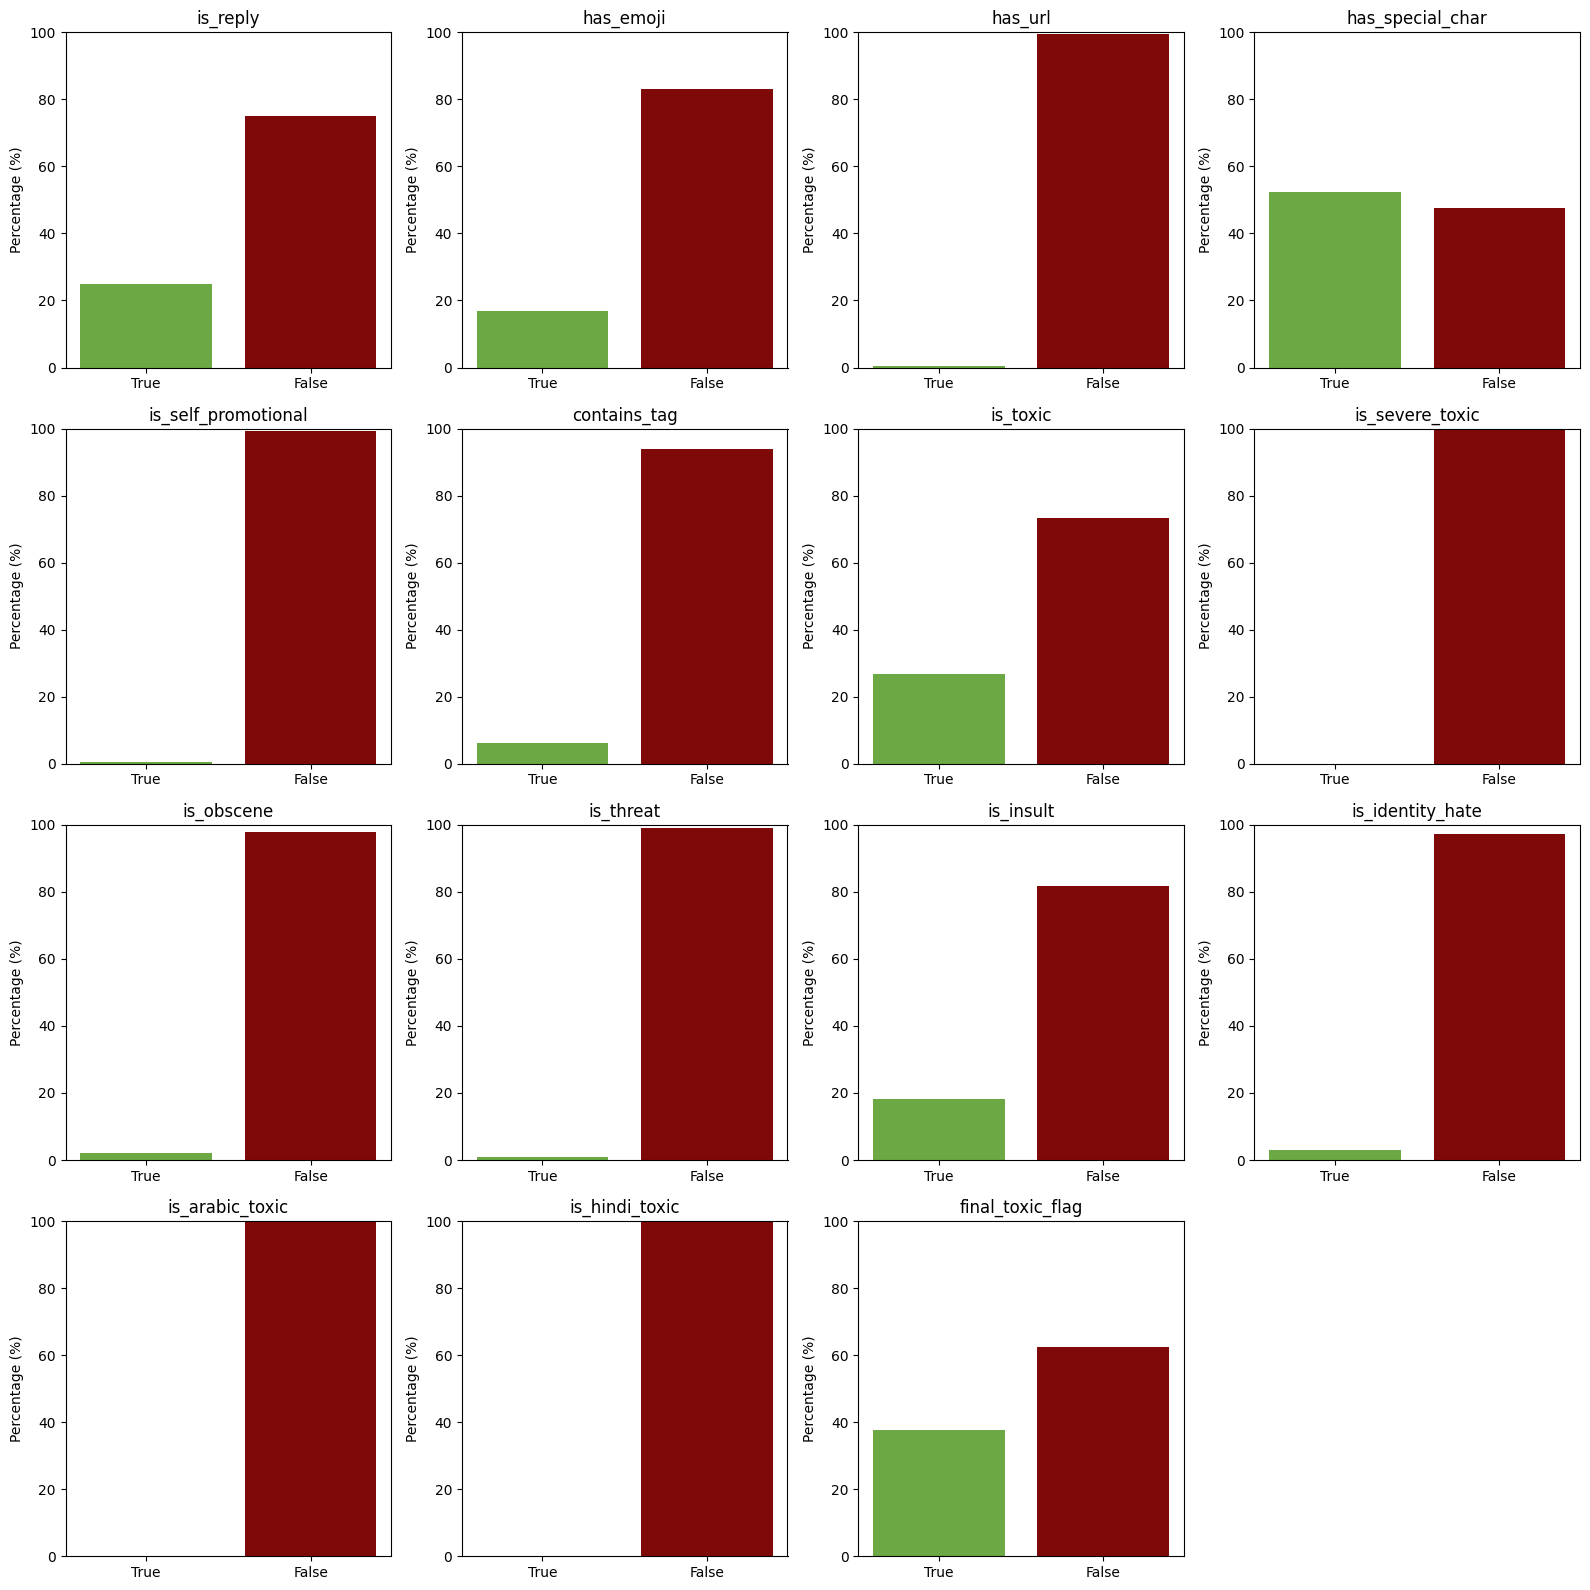

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

def is_boolean_like(series):
    """
    Check if a pandas Series is boolean-like.
    Returns True if dtype is boolean or all unique non-NaN values are 0 or 1.
    """
    try:
        if not isinstance(series, pd.Series):
            return False

        if pd.api.types.is_bool_dtype(series):
            return True

        # Get unique non-NaN values
        unique_vals = series.dropna().unique()
        return all(v in [0, 1] for v in unique_vals)

    except Exception:
        return False


def make_column_names_unique(df):
    """
    Return a copy of the DataFrame with duplicate columns renamed uniquely.
    For example, columns ['A', 'A', 'B'] -> ['A', 'A.1', 'B']
    """
    df = df.copy()
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        dup_indices = cols[cols == dup].index.tolist()
        for i, idx in enumerate(dup_indices):
            if i == 0:
                continue  # Leave first occurrence unchanged
            cols[idx] = f"{dup}.{i}"
    df.columns = cols
    return df


def plot_all_booleans_together(df):
    """
    Detect all boolean-like columns in df and plot their True/False percentages.
    Handles duplicate columns by renaming first.
    """
    # Make column names unique to avoid confusion
    df = make_column_names_unique(df)

    # Identify boolean-like columns
    bool_columns = [col for col in df.columns if is_boolean_like(df[col])]

    if not bool_columns:
        print("No boolean-like columns found in the DataFrame.")
        return

    n = len(bool_columns)
    ncols = 4
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(bool_columns):
        # Convert column to boolean type for accurate mean calculation
        df[col] = df[col].astype(bool)

        true_pct = df[col].mean() * 100
        false_pct = 100 - true_pct

        axes[i].bar(['True', 'False'], [true_pct, false_pct], color=['#6CA944', '#7F0908'])
        axes[i].set_title(col)
        axes[i].set_ylim(0, 100)
        axes[i].set_ylabel('Percentage (%)')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


# call:
plot_all_booleans_together(df_youtube_extract)

diccionario

| Column Name          | Description                                                                                         |
|----------------------|-----------------------------------------------------------------------------------------------------|
| thread_id            | Unique identifier for the comment thread, grouping the original comment and its replies             |
| comment_id           | Unique identifier for each individual comment                                                       |
| video_id             | Unique identifier of the YouTube video where the comment was posted                                 |
| author               | Display name of the user who posted the comment                                                    |
| author_channel_id    | Unique identifier of the YouTube channel of the comment author                                      |
| is_reply             | Boolean indicating if the comment is a reply to another comment (True) or a top-level comment (False)|
| parent_comment_id    | Identifier of the parent comment if this comment is a reply; null or empty if top-level comment     |
| published_at_comment | Timestamp when the comment was originally published                                                 |
| text                 | The textual content of the comment                                                                 |
| like_count_comment   | Number of likes that the comment has received                                                      |
| reply_count          | Number of replies the comment has (only applicable for top-level comments)                          |


_______
# <center> <span style="color:#f6f794"> 💾💾💾💾💾 Saving in GitHub Compressed 💾💾💾💾💾</center>

In [ ]:
# # Saving data in cleaning_file_path and in GitHub so it can be used in the next steps and the rest of the team can access it
cleaning_file_path = os.path.join(data_dir, "youtube_extract_cleaned.csv.gz")

# Saving the cleaned DataFrame to a compressed CSV file
df_youtube_extract.to_csv(
    cleaning_file_path,
    index=False,
    compression='gzip',
    sep=',',                  # Crucial: Specify delimiter even for compressed
    encoding='utf-8',         # Crucial: Specify encoding
    quoting=csv.QUOTE_MINIMAL # Crucial: Specify quoting behavior
)
print(f"✅ Data saved successfully at {cleaning_file_path}")

In [ ]:
# Saving the csv file in the data directory
cleaning_file_path = os.path.join(data_dir, "youtube_dataset_checking.csv")
# Saving the cleaned DataFrame to a CSV file
df_youtube_extract.to_csv(
    cleaning_file_path,
    index=False,
    sep=',',                  # Crucial: Specify delimiter
    encoding='utf-8',         # Crucial: Specify encoding
    quoting=csv.QUOTE_MINIMAL # Crucial: Specify quoting behavior
)
print(f"✅ Data saved successfully at {cleaning_file_path}")